# Tarea semanal 7

Yanina Corsaro

3) Genere la siguiente señal
x(k)=a0⋅sen(Ω1⋅k)
siendo

a0=2
Ω1=Ω0+fr⋅2πN
Ω0=π2
y la variable aleatoria definida por la siguiente distribución de probabilidad

fr∼U(−2,2)


Considere 200 realizaciones (muestras tomadas de fr) para cada ventana analizada en la TS6. Se pide entonces:

3.a) Grafique los histogramas de
|Xiw(Ω0)|


siendo

|Xiw(Ω)|=|F{x(k)⋅wi(k)}|
para la i-ésima ventana de las 5 utilizadas en la TS6. El sesgo y la varianza se definen para este caso como:

 Grafique los 5 histogramas juntos, o cuide que todos los gráficos tengan el mismo rango de valores en X para facilitar la comparación visual.
3.b) Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
a0^=|Xiw(Ω0)|
siendo

sa=E{a0^}−a0

va=var{a0^}=E{(a0^−E{a0^})2}
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales

E{a0^}=μa^=1M∑j=0M−1aj^

sa=μa^−a0

va=1M∑j=0M−1(aj^−μa^)2

Text(0, 0.5, '$|X(\\Omega)|$')

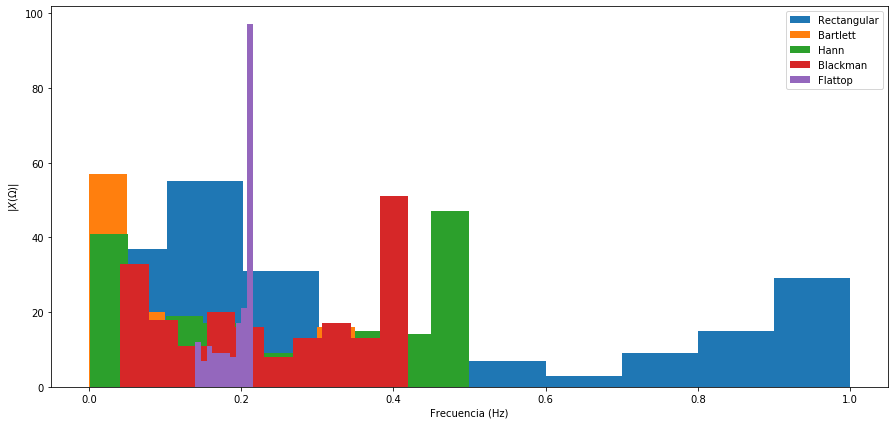

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from sen import mi_funcion_sen
import scipy.signal as sig
from scipy.fftpack import fft, fftfreq
from pandas import DataFrame
from IPython.display import HTML

mpl.rcParams['figure.figsize'] = (15,7) 

# parámetros de la senoidal
N  = 1000 # muestras
fs = 1000 # Hz
dt = 1/(fs)
df = fs/N # resolución espectral
a0 = 2
m = 200 # muestras variable aleatoria

fr = np.random.uniform(low=-2, high=2, size=m)
omega = np.pi*(0.5 + (fr*2/N))

tt = np.linspace( 0, N-1,N)

# calculo la senoidal y normalizo con dt porque sino quedaban valores muy grandes
y= a0*np.sin( np.outer(tt, omega))*dt

# multiplico y por las ventanas de la ts6
rectangular = y*np.array(sig.boxcar(N)).reshape(N,1)
bartlett = y*np.array(sig.bartlett(N)).reshape(N,1)
hann = y*np.array(sig.hann(N)).reshape(N,1)
blackman = y*np.array(sig.blackman(N)).reshape(N,1)
flattop = y*np.array(sig.flattop(N)).reshape(N,1)

# calculo la fft
ff = fftfreq(N, d=dt)
ft_rectangular = fft(rectangular,N,axis=0)
ft_bartlett = fft(bartlett,N,axis=0)
ft_hann = fft(hann,N,axis=0)
ft_blackman = fft(blackman,N,axis=0)
ft_flattop = fft(flattop,N,axis=0)

# calculo los módulos de las fft
ft_rectangular = np.abs(ft_rectangular)
ft_bartlett = np.abs(ft_bartlett)
ft_hann = np.abs(ft_hann)
ft_blackman = np.abs(ft_blackman)
ft_flattop = np.abs(ft_flattop)


# grafico los histogramas

plt.figure(1)

plt.hist(ft_rectangular[250])
plt.hist(ft_bartlett[250])
plt.hist(ft_hann[250])
plt.hist(ft_blackman[250])
plt.hist(ft_flattop[250])

plt.legend(['Rectangular','Bartlett','Hann','Blackman','Flattop'])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('$|X(\Omega)|$')


In [14]:
# calculo los parámetros pedidos: sesgo y varianza con las funciones de numpy

wt = [ft_rectangular[250], ft_bartlett[250], ft_hann[250], ft_blackman[250], ft_flattop[250]]

tus_resultados1 = []
tus_resultados2 = []

for w in wt:
    tus_resultados1.append(np.mean(w)-a0)   
    tus_resultados2.append(np.var(w)) 

# dataframe para visualizar los datos

d = {'s':tus_resultados1, 'v':tus_resultados2}
df = DataFrame(data = d,
               index=['Rectangular',  
                      'Bartlett', 
                      'Hann',
                      'Blackman',
                      'Flattop'])
HTML(df.to_html())

,s,v
Rectangular,-1.629937,0.106062
Bartlett,-1.782584,0.033968
Hann,-1.755835,0.031253
Blackman,-1.762474,0.017080
Flattop,-1.804659,0.000531
